In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import seaborn as sns
import SimpleITK as sitk
import matplotlib.backends.backend_pdf
import pandas as pd

plt.rcParams['figure.figsize'] = [18, 15]

In [50]:
root_path = "/Users/amithkamath/repo/deep-planner"
results_path = os.path.join(root_path, "results")

In [51]:
perturbation_data = os.path.join(results_path, "perturbation_data_new.csv")

results = pd.read_csv(perturbation_data)
results = results.sort_values(by=['Structure'])

In [52]:
results.loc[results['Structure'] == "BrainStem"]

,Unnamed: 0,Case,Structure,NumPts,Size,AvgDiff,StdDiff,XCorrGrad,XCorrDist
50,50,DLDP_084,BrainStem,854,1827,1839.51160,641.93930,-0.041761,0.095959
89,89,DLDP_087,BrainStem,792,1640,609.65625,317.51680,0.556076,-0.699927
154,154,DLDP_092,BrainStem,736,1618,976.95905,461.01492,0.106072,-0.343952
76,76,DLDP_086,BrainStem,955,2193,1829.99240,1098.12710,-0.046140,0.011969
37,37,DLDP_083,BrainStem,1016,2393,615.24890,334.60570,0.232091,-0.631486
63,63,DLDP_085,BrainStem,899,2091,744.25010,428.81094,0.647348,-0.783412
102,102,DLDP_088,BrainStem,896,2162,1766.42520,884.30383,-0.060283,-0.093371
141,141,DLDP_091,BrainStem,998,2268,1794.58570,806.86290,-0.080355,-0.026119
24,24,DLDP_082,BrainStem,967,2363,898.96420,900.79535,0.902698,-0.670010
115,115,DLDP_089,BrainStem,843,1966,1325.57450,614.60160,0.178478,-0.480856


In [53]:
#ax = sns.boxplot(data=results, x="Structure", y="AvgDiff")
#plt.grid()  #just add this
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

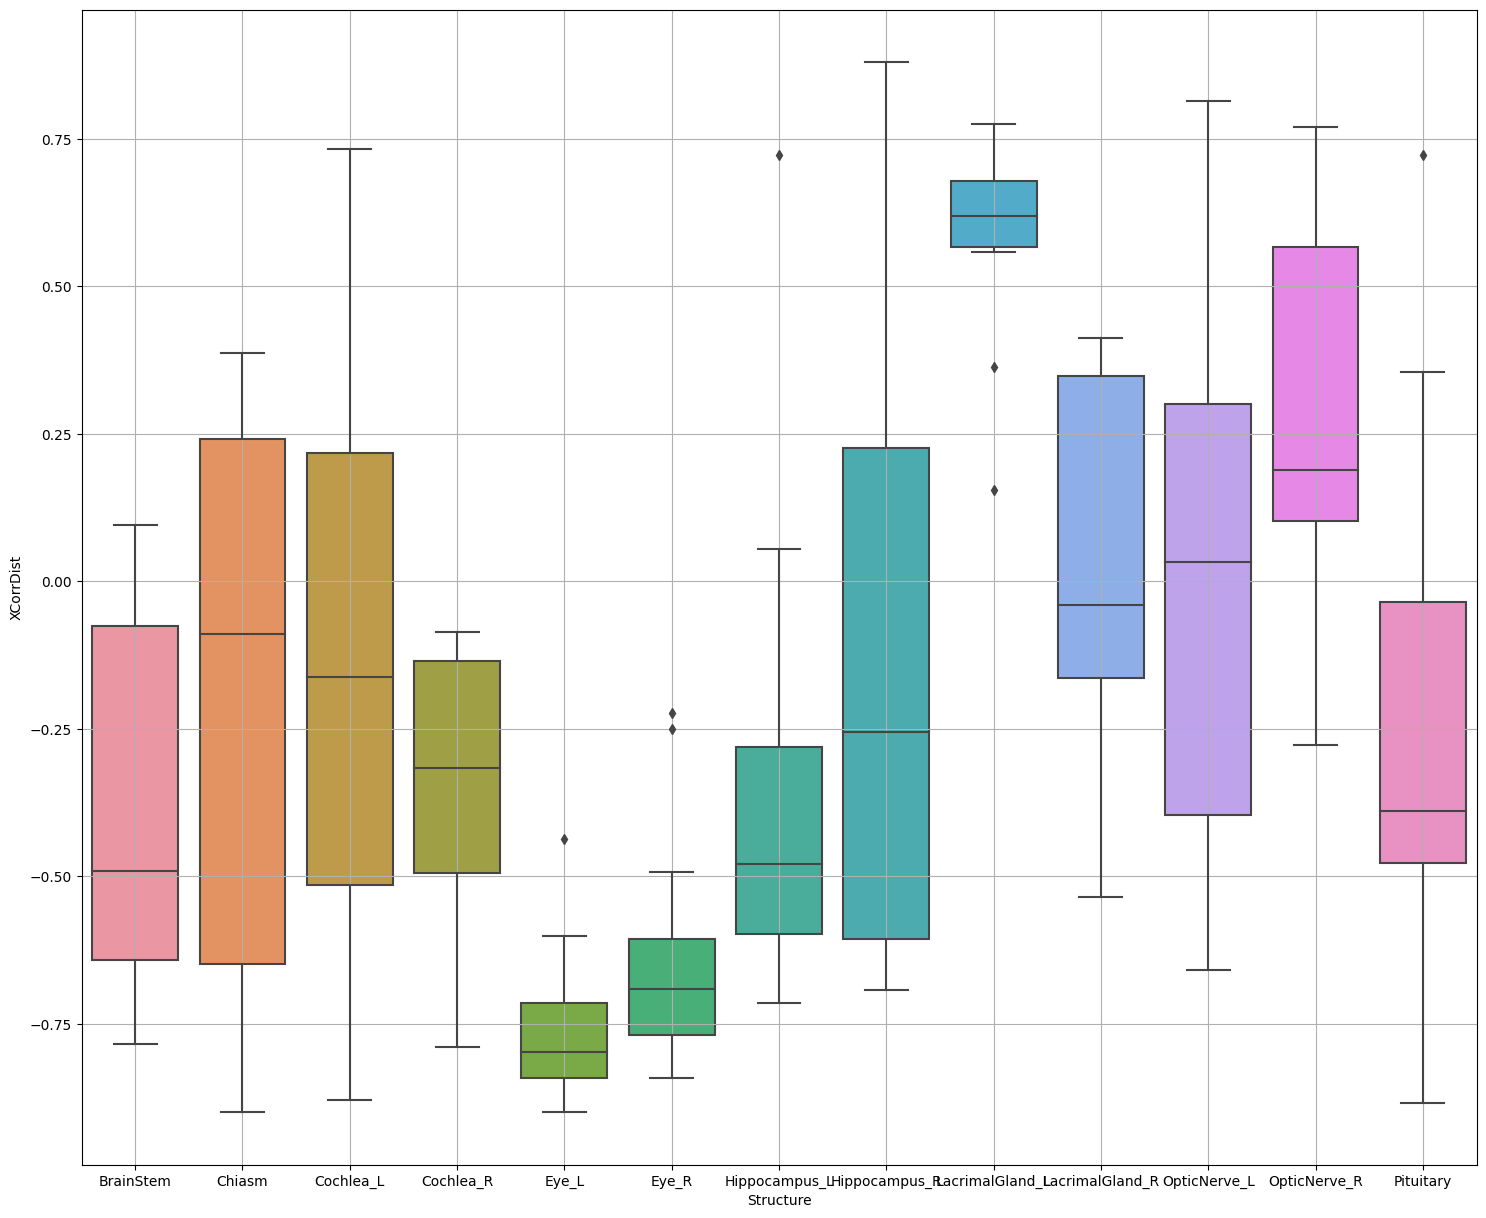

In [54]:
ax = sns.boxplot(data=results, x="Structure", y="XCorrDist")
plt.grid()  #just add this
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [55]:
results.groupby('Structure').mean()

,Unnamed: 0,NumPts,Size,AvgDiff,StdDiff,XCorrGrad,XCorrDist
Structure,,,,,,,
BrainStem,82.5,886.416667,2026.833333,1177.809900,619.735250,0.229567,-0.388359
Chiasm,78.5,131.416667,43.916667,2031.101442,838.770015,0.058997,-0.196870
Cochlea_L,80.5,52.250000,8.416667,155.617268,44.168786,0.179635,-0.166519
Cochlea_R,73.5,51.166667,8.833333,798.728435,171.240458,0.181041,-0.334890
Eye_L,77.5,338.083333,617.166667,4365.939492,2002.765842,0.056592,-0.760699
Eye_R,71.5,335.000000,607.000000,4189.981850,1766.262237,0.012342,-0.633202
Hippocampus_L,74.5,262.333333,182.666667,26824.167750,7433.560942,0.408673,-0.347213
Hippocampus_R,79.5,272.583333,197.916667,18509.339417,6879.606367,0.497823,-0.140774
LacrimalGland_L,76.5,149.916667,76.583333,1584.350108,1106.227491,0.390808,0.584641


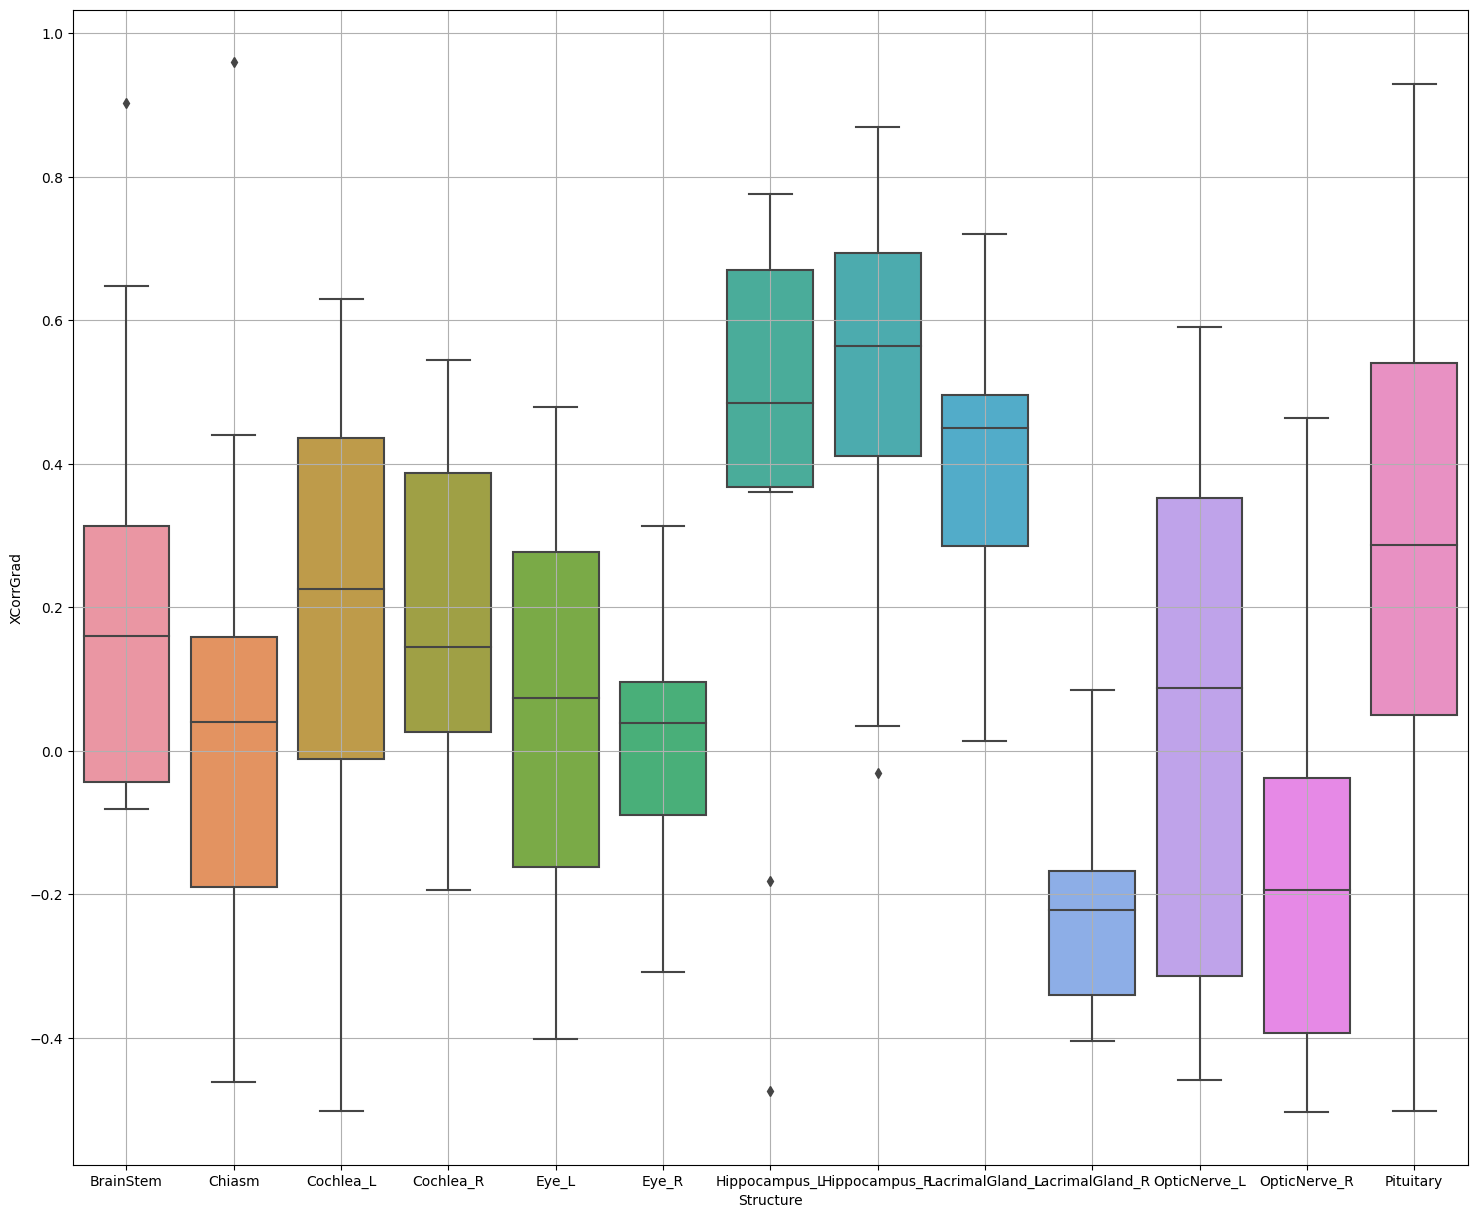

In [56]:
ax = sns.boxplot(data=results, x="Structure", y="XCorrGrad")
plt.grid()  #just add this
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [57]:
geometry_data = os.path.join(results_path, "target_geometry.csv")

target_geometry = pd.read_csv(geometry_data)

In [58]:
target_geometry.columns

Index(['Case', 'Volume', 'Surface', 'Dose', 'DVH'], dtype='object')

Text(0.5, 0.1, 'Correlation Coefficient: 0.6622')

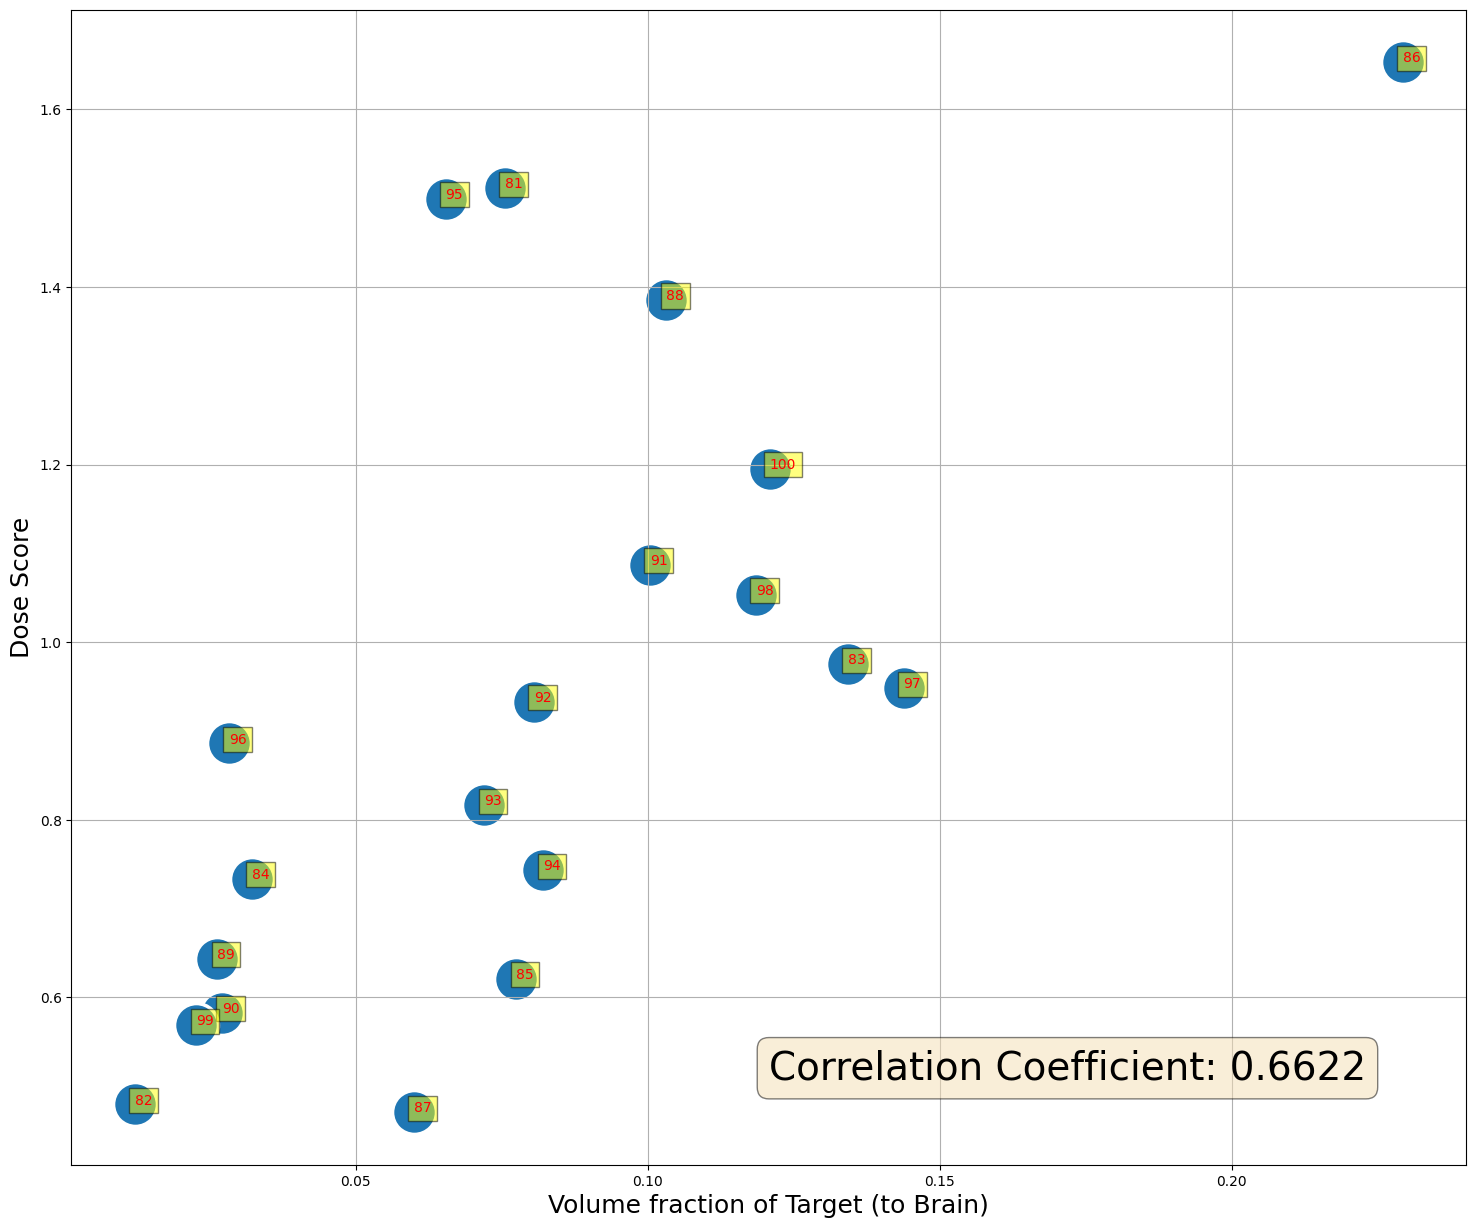

In [59]:
ax = sns.scatterplot(data=target_geometry, x="Volume", y="Dose", s=1000)
plt.grid()

for i in range(target_geometry.shape[0]):
 plt.text(x=target_geometry.Volume[i],y=target_geometry.Dose[i],s=target_geometry.Case[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

plt.xlabel('Volume fraction of Target (to Brain)', fontsize=18)
plt.ylabel('Dose Score', fontsize=18)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.5, 0.1, "Correlation Coefficient: 0.6622", transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)

Text(0.5, 0.1, 'Correlation Coefficient: 0.8061')

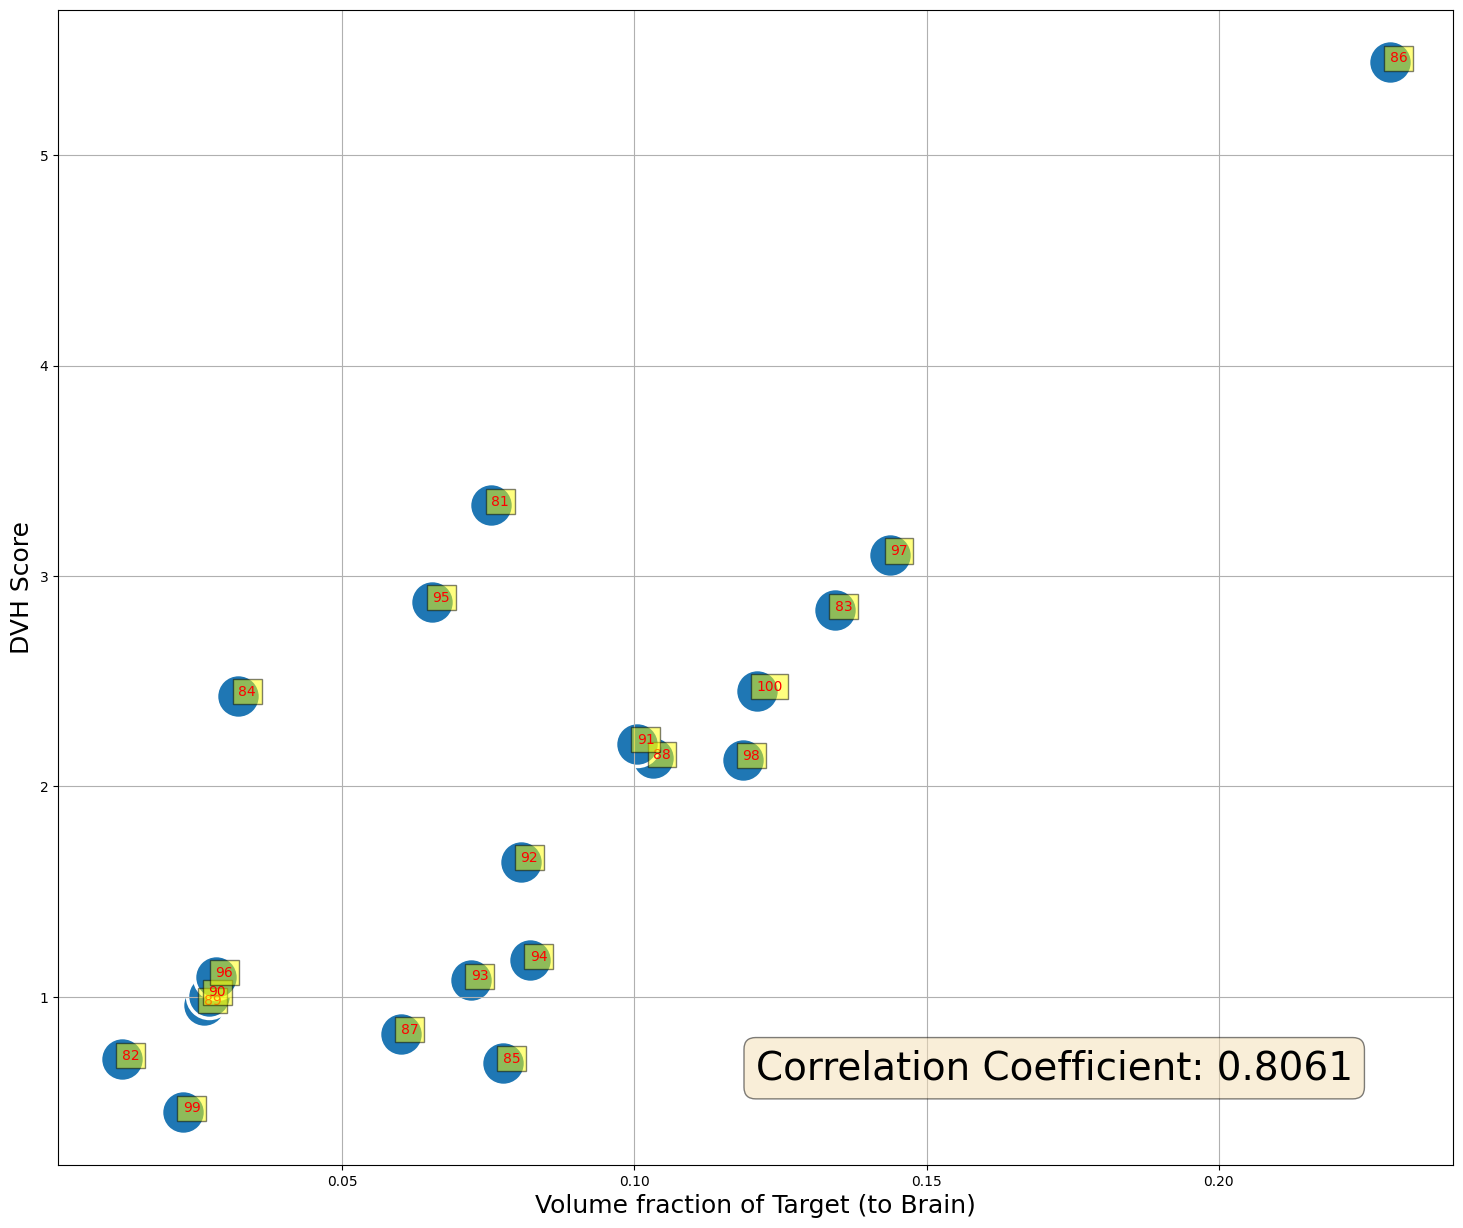

In [60]:
ax = sns.scatterplot(data=target_geometry, x="Volume", y="DVH", s=1000)
plt.grid()
for i in range(target_geometry.shape[0]):
 plt.text(x=target_geometry.Volume[i],y=target_geometry.DVH[i],s=target_geometry.Case[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

plt.xlabel('Volume fraction of Target (to Brain)', fontsize=18)
plt.ylabel('DVH Score', fontsize=18)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.5, 0.1, "Correlation Coefficient: 0.8061", transform=ax.transAxes, fontsize=28,
        verticalalignment='top', bbox=props)